In [1]:
import sys
#print(sys.version)

import matplotlib.pyplot as plt
#%config BackendInline.figure_format='svg'

plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
#plt.matplotlib.rcParams['figure.dpi'] = 120
#plt.matplotlib.rcParams['savefig.dpi'] = 120

import numpy as np
import pandas as pd

import mlgrad.model as model
import mlgrad.func as func
import mlgrad.regular as regular
import mlgrad.loss as loss
import mlgrad.weights as weights
import mlgrad.averager as averager
import mlgrad.avragg as avragg

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, erisk

## Dataset 1

In [2]:
data = pd.read_csv('data/stackloss.csv')

In [3]:
X = np.log(data['WATERTEMP'].values)
X = X.astype('d')
Xs = X.reshape(-1,1)
Y = np.log(data['STACKLOSS'].values)
Y = Y.astype('d')

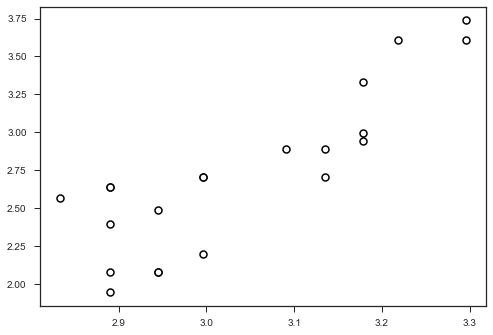

In [4]:
#plt.scatter(data['STACKLOSS'], data['AIRFLOW'], c='w', edgecolor='k', linewidth=1.5)
#plt.scatter(data['STACKLOSS'], data['ACIDCONC'], c='w', edgecolor='k', linewidth=1.5)
plt.scatter(X, Y, c='w', edgecolor='k', linewidth=1.5)
#pd.plotting.scatter_matrix(data, figsize=(15,12), s=81)
plt.show()

In [5]:
loss_func_sq = loss.ErrorLoss(func.Square())
loss_func_abs = loss.ErrorLoss(func.Sqrt())
loss_func_hub = loss.ErrorLoss(func.Huber())
# loss_func_am = loss.ErrorLoss(func.ArithMod())

In [6]:
mod1 = model.LinearModel(1)
mod1.init()
mod2 = model.LinearModel(1)
mod2.init()
mod3 = model.LinearModel(1)
mod3.init()

Completed? True


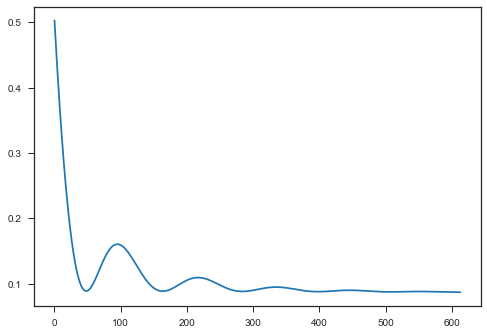

In [7]:
er1 = erisk(Xs, Y, mod1, loss_func_sq)
_fg1 = erm_fg(er1, h=0.005, tol=1.0e-7, verbose=0)
print("Completed?", _fg1.completed)

plt.plot(_fg1.lvals)
plt.show()

Completed? True


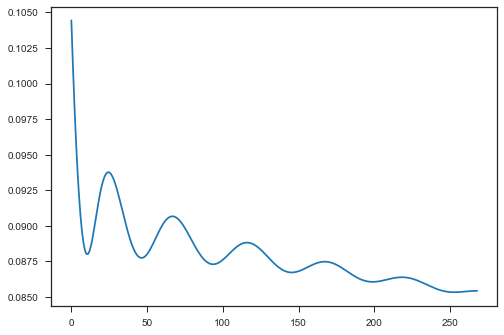

In [8]:
er2 = erisk(Xs, Y, mod2, loss_func_abs)
_fg2 = erm_fg(er2, h=0.005, tol=1.0e-7, verbose=0)
print("Completed?", _fg2.completed)

plt.plot(_fg2.lvals)
plt.show()

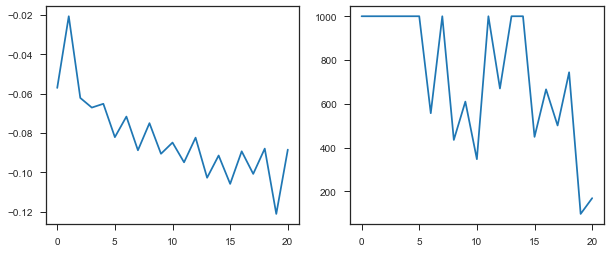

In [9]:
er3 = erisk(Xs, Y, mod3, loss_func_sq)
_fg3 = fg(er3, h=0.005, tol=1.0e-8)
avg3_ = averager_it(func.QuantileFunc(0.85, func.Sqrt(0.001)))
avg3 = avragg.ParameterizedAverage(func.SoftMinFunc(4), avg3_)
wg3 = weights.MWeights(avg3, er3)
irgd3 = erm_irgd(_fg3, wg3, n_iter=21, verbose=0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(irgd3.lvals)
plt.subplot(1,2,2)
plt.plot(irgd3.n_iters)
plt.show()

In [10]:
result = {
    'nn':(
        mod1, mod2, mod3),
    'title':(
        'ER / Squared Errors',
        'ER / Absolute Errors',
        'M / Absolute Errors'),
    'b':0.4
}

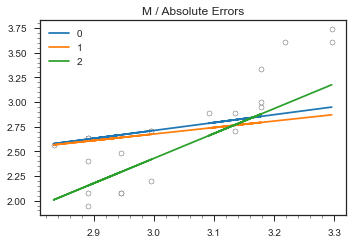

In [11]:
m_q = len(result)
plt.figure(figsize=(5.0, 3.5))
plt.scatter(X, Y, s=25, c='w', edgecolor='k')
for i in range(3):
    current = result
    b = current['b']
    _ffnn = current['nn'][i]
    Y1 = np.array([_ffnn(x) for x in Xs])
    title = current['title'][i]
    plt.title(title)
    V = np.abs(Y-Y1)
    V = np.sort(V)
    plt.plot(X, Y1, label=str(i))
plt.minorticks_on()
plt.tight_layout()
plt.legend()
#plt.savefig(r"fig/isnn2018_dataset_1_%s.pdf" % n_hidden)
plt.show()

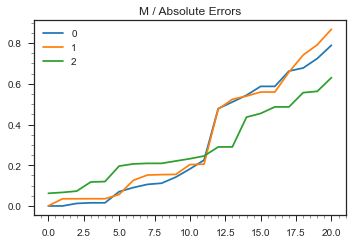

In [12]:
m_q = len(result)
plt.figure(figsize=(5.0, 3.5))
for i in range(3):
    current = result
    b = current['b']
    _ffnn = current['nn'][i]
    Y1 = np.array([_ffnn(x) for x in Xs])
    title = current['title'][i]
    plt.title(title)
    V = np.abs(Y-Y1)
    V = np.sort(V)
    plt.plot(V, label=str(i))
plt.minorticks_on()
plt.tight_layout()
plt.legend()
#plt.savefig(r"fig/isnn2018_dataset_1_%s.pdf" % n_hidden)
plt.show()